<a href="https://colab.research.google.com/github/nadiyalalalala/DOMpractice2/blob/main/Practice_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, confusion_matrix, classification_report,
                            roc_auc_score)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Dense, Dropout, BatchNormalization,
                                    Conv1D, Flatten, Reshape)
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# 1. Деректер жинағын жүктеу
data = pd.read_csv('/content/cybersecurity_intrusion_data.csv')


In [3]:
# Деректерді талдау (EDA)
print("Деректер жинағы туралы ақпарат:")
print(data.info())
print("\nЖоқ мәндер:")
print(data.isnull().sum())
print("\nСыныптардың таралуы:")
print(data['attack_detected'].value_counts())


Деректер жинағы туралы ақпарат:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB
None

Жоқ мәндер:
session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration 

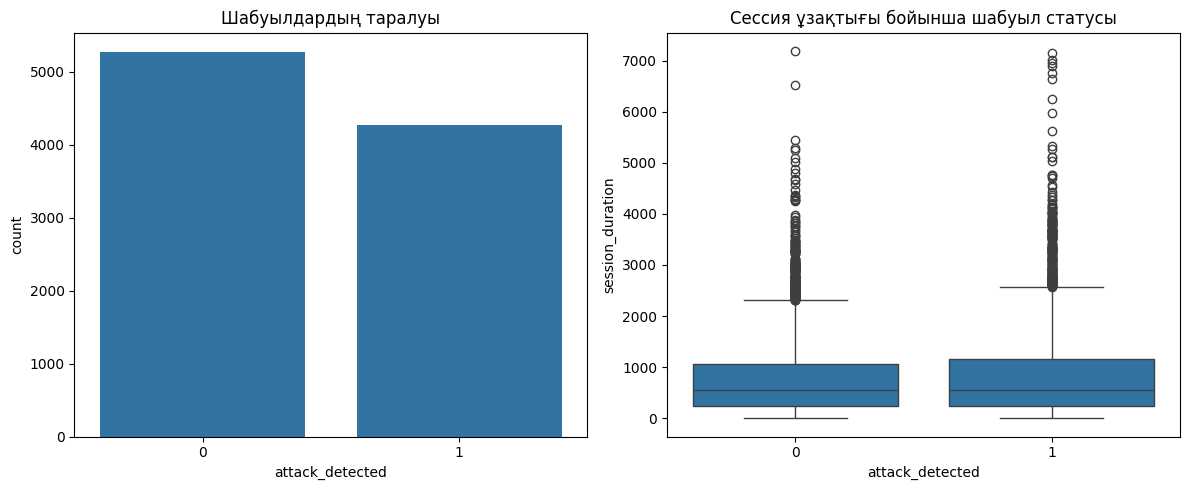

In [5]:
# Көрнекіліктер
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='attack_detected', data=data)
plt.title('Шабуылдардың таралуы')

plt.subplot(1, 2, 2)
sns.boxplot(x='attack_detected', y='session_duration', data=data)
plt.title('Сессия ұзақтығы бойынша шабуыл статусы')
plt.tight_layout()
plt.show()

In [6]:
# Деректерді дайындау
# Сессия ID-сын жою (модельдеу үшін қажет емес)
data = data.drop('session_id', axis=1)

In [7]:
# encryption_used бағанындағы жоқ мәндерді толтыру
data['encryption_used'] = data['encryption_used'].fillna('unknown')

In [8]:
# Ерекшеліктер мен мақсатты айнымалыны бөлу
X = data.drop('attack_detected', axis=1)
y = data['attack_detected']

In [9]:
# Сандық және санақтық ерекшеліктерді анықтау
categorical_features = ['protocol_type', 'encryption_used', 'browser_type']
numerical_features = [col for col in X.columns if col not in categorical_features]

In [10]:
# Деректерді өңдеу конвейері
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Сандық ерекшеліктерді масштабтау
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Санақтық ерекшеліктерді кодтау
    ])

In [11]:
# Деректерді оқу және тест жиындарына бөлу
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [12]:
# Деректерді өңдеу
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [13]:
# Сыныптар арасындағы теңсіздікті жою (SMOTE әдісі)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [14]:
# Дәстүрлі машиналық оқыту модельдері
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),  # Логистикалық регрессия
    "Decision Tree": DecisionTreeClassifier(max_depth=5),  # Шешімдер ағашы
    "Random Forest": RandomForestClassifier(n_estimators=100),  # Кездейсоқ орман
    "XGBoost": XGBClassifier(),  # XGBoost алгоритмі
    "SVM": SVC(probability=True)  # Қолдау векторлық машинасы
}

In [15]:
# Модельдерді оқыту және бағалау
results = {}
for name, model in models.items():
    model.fit(X_train_res, y_train_res)  # Модельді оқыту
    y_pred = model.predict(X_test)  # Болжаулар жасау

    # Өнімділік көрсеткіштерін есептеу
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),  # Дәлдік
        "Precision": precision_score(y_test, y_pred),  # Нақтылық
        "Recall": recall_score(y_test, y_pred),  # Еске алу
        "F1": f1_score(y_test, y_pred),  # F1 балл
        "ROC AUC": roc_auc_score(y_test, y_pred)  # ROC AUC
    }


In [16]:
# Нәтижелерді көрсету
results_df = pd.DataFrame(results).T
print("\nМодельдердің өнімділігін салыстыру:")
print(results_df.sort_values('F1', ascending=False))


Модельдердің өнімділігін салыстыру:
                     Accuracy  Precision    Recall        F1   ROC AUC
Random Forest        0.884172   0.989164  0.749121  0.852568  0.871243
Decision Tree        0.884172   1.000000  0.740914  0.851178  0.870457
XGBoost              0.874214   0.959520  0.750293  0.842105  0.862350
SVM                  0.868973   0.947994  0.747948  0.836173  0.857387
Logistic Regression  0.720650   0.680587  0.706917  0.693502  0.719335


In [17]:
# Терең оқыту модельдерін құру
def build_mlp(input_shape):
    """Көп қабатты перцептронды құру функциясы"""
    model = Sequential([
        Dense(64, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy',
                          tf.keras.metrics.Precision(),
                          tf.keras.metrics.Recall()])
    return model

def build_cnn(input_shape):
    """Конволюциялық нейронды желі құру функциясы"""
    model = Sequential([
        Reshape((input_shape[0], 1), input_shape=input_shape),
        Conv1D(32, 3, activation='relu'),
        Flatten(),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

def build_dnn(input_shape):
    """Терең нейронды желі құру функциясы"""
    model = Sequential([
        Dense(128, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

In [18]:
# Ерте тоқтату callback функциясы
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

In [19]:
# MLP модельді оқыту
mlp_model = build_mlp((X_train.shape[1],))
mlp_history = mlp_model.fit(
    X_train_res, y_train_res,
    epochs=50,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stopping],
    verbose=0
)
y_pred_mlp = (mlp_model.predict(X_test) > 0.5).astype(int)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [20]:
# CNN үшін деректерді қайта пішімдеу
X_train_cnn = X_train_res.reshape(X_train_res.shape[0], X_train_res.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# CNN модельді оқыту
cnn_model = build_cnn((X_train_res.shape[1],))
cnn_history = cnn_model.fit(
    X_train_cnn, y_train_res,
    epochs=50,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)
y_pred_cnn = (cnn_model.predict(X_test_cnn) > 0.5).astype(int)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6690 - loss: 0.6352 - val_accuracy: 0.6979 - val_loss: 0.5976
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7781 - loss: 0.5054 - val_accuracy: 0.7192 - val_loss: 0.5731
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8097 - loss: 0.4532 - val_accuracy: 0.7713 - val_loss: 0.5029
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8301 - loss: 0.4294 - val_accuracy: 0.7464 - val_loss: 0.5481
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8457 - loss: 0.4065 - val_accuracy: 0.7701 - val_loss: 0.5074
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8455 - loss: 0.4001 - val_accuracy: 0.7725 - val_loss: 0.4955
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8578 - loss: 0.3870 - val_accuracy: 0.7808 - val_loss: 0.4648
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8605 - loss: 0.3792 - val_accuracy: 0.7832 - val_

In [21]:
# DNN модельді оқыту
dnn_model = build_dnn((X_train.shape[1],))
dnn_history = dnn_model.fit(
    X_train_res, y_train_res,
    epochs=50,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stopping],
    verbose=1
)
y_pred_dnn = (dnn_model.predict(X_test) > 0.5).astype(int)

Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6840 - loss: 0.6310 - val_accuracy: 0.8519 - val_loss: 0.4137
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8073 - loss: 0.4526 - val_accuracy: 0.8033 - val_loss: 0.3971
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8145 - loss: 0.4351 - val_accuracy: 0.7808 - val_loss: 0.4395
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8448 - loss: 0.3952 - val_accuracy: 0.7713 - val_loss: 0.4667
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8465 - loss: 0.3789 - val_accuracy: 0.7832 - val_loss: 0.4487
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8488 - loss: 0.3788 - val_accuracy: 0.7749 - val_loss: 0.4539
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8616 - loss: 0.3604 - val_accuracy: 0.7796 - val_loss: 0.4510
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [22]:
# Терең оқыту модельдерінің нәтижелерін қосу
dl_models = {
    "MLP": y_pred_mlp,
    "CNN": y_pred_cnn,
    "DNN": y_pred_dnn
}
for name, y_pred in dl_models.items():
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_pred)
    }

In [23]:
# Барлық нәтижелерді көрсету
results_df = pd.DataFrame(results).T
print("\nБарлық модельдердің өнімділігін салыстыру:")
print(results_df.sort_values('F1', ascending=False))


Барлық модельдердің өнімділігін салыстыру:
                     Accuracy  Precision    Recall        F1   ROC AUC
Random Forest        0.884172   0.989164  0.749121  0.852568  0.871243
Decision Tree        0.884172   1.000000  0.740914  0.851178  0.870457
MLP                  0.881551   0.998410  0.736225  0.847503  0.867639
XGBoost              0.874214   0.959520  0.750293  0.842105  0.862350
SVM                  0.868973   0.947994  0.747948  0.836173  0.857387
CNN                  0.867925   0.943870  0.749121  0.835294  0.856551
DNN                  0.830189   0.838668  0.767878  0.801714  0.824223
Logistic Regression  0.720650   0.680587  0.706917  0.693502  0.719335


In [24]:
# Оқу тарихын көрсету
plt.figure(figsize=(19, 10))

<Figure size 1900x1000 with 0 Axes>

<Figure size 1900x1000 with 0 Axes>

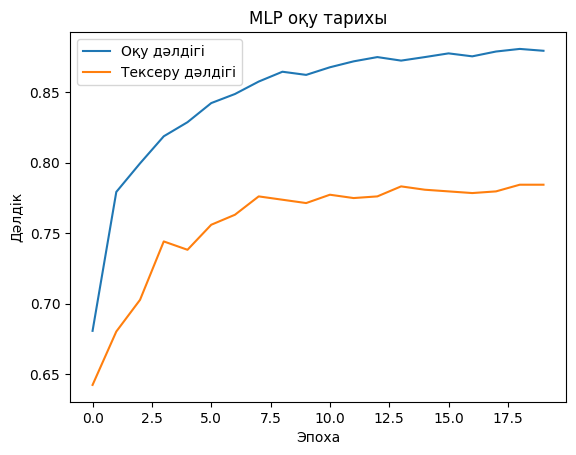

In [26]:
# MLP үшін оқу тарихы
plt.subplot(1, 1, 1)
plt.plot(mlp_history.history['accuracy'], label='Оқу дәлдігі')
plt.plot(mlp_history.history['val_accuracy'], label='Тексеру дәлдігі')
plt.title('MLP оқу тарихы')
plt.ylabel('Дәлдік')
plt.xlabel('Эпоха')
plt.legend()

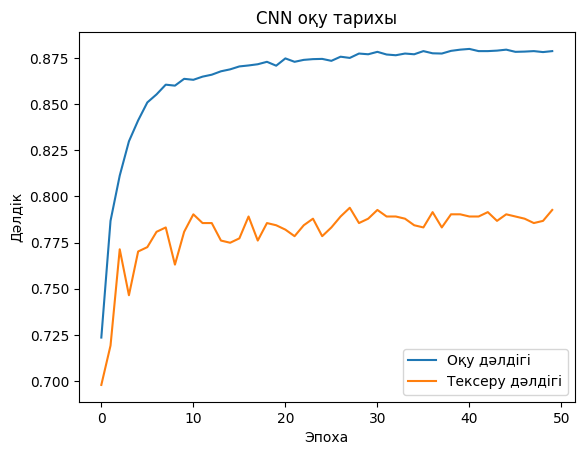

In [27]:
# CNN оқу тарихы
plt.subplot(1, 1, 1)
plt.plot(cnn_history.history['accuracy'], label='Оқу дәлдігі')
plt.plot(cnn_history.history['val_accuracy'], label='Тексеру дәлдігі')
plt.title('CNN оқу тарихы')
plt.ylabel('Дәлдік')
plt.xlabel('Эпоха')
plt.legend()

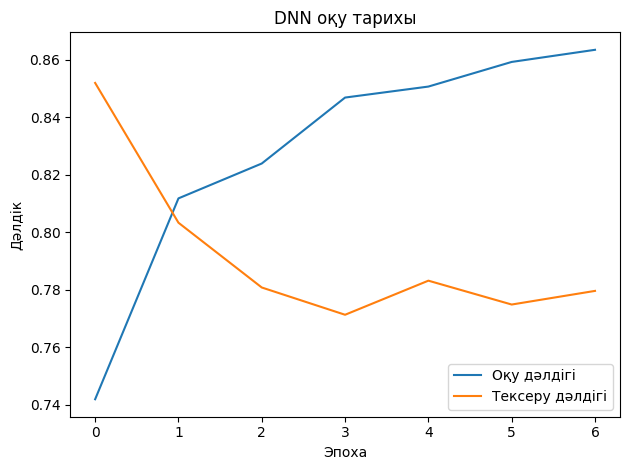

In [28]:
# DNN History
plt.subplot(1, 1, 1)
plt.plot(dnn_history.history['accuracy'], label='Оқу дәлдігі')
plt.plot(dnn_history.history['val_accuracy'], label='Тексеру дәлдігі')
plt.title('DNN оқу тарихы')
plt.ylabel('Дәлдік')
plt.xlabel('Эпоха')
plt.legend()

plt.tight_layout()
plt.show()

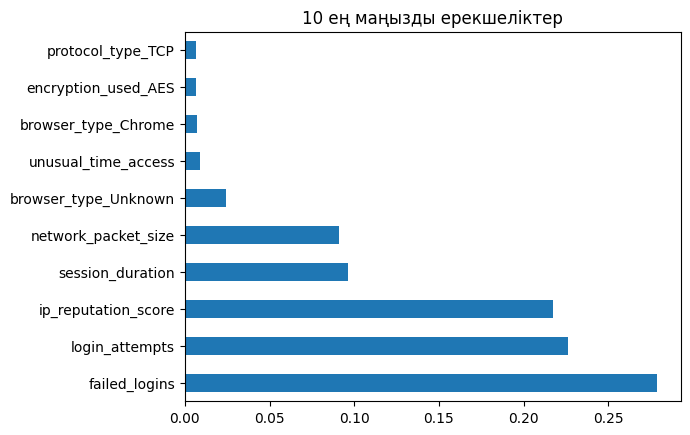

In [29]:
# Маңызды ерекшеліктерді көрсету
rf = RandomForestClassifier().fit(X_train_res, y_train_res)
feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
importances = pd.Series(rf.feature_importances_, index=feature_names)
importances.nlargest(10).plot(kind='barh')
plt.title('10 ең маңызды ерекшеліктер')
plt.show()

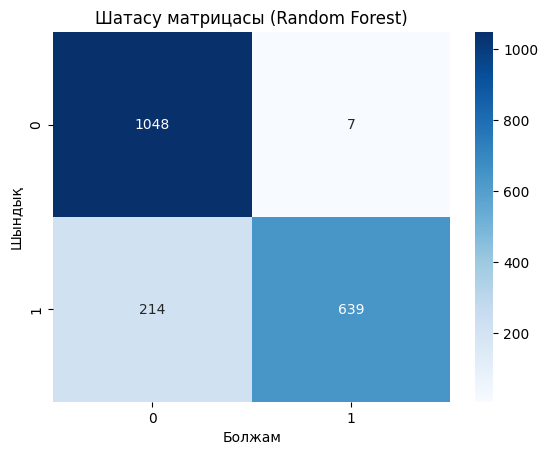

In [30]:
# Ең жақсы модель үшін шатасу матрицасы
best_model_name = results_df['F1'].idxmax()
if best_model_name in models:
    best_model = models[best_model_name]
elif best_model_name == "MLP":
    best_model = mlp_model
elif best_model_name == "CNN":
    best_model = cnn_model
else:
    best_model = dnn_model

if best_model_name in models:
    y_pred_best = best_model.predict(X_test)
else:
    if best_model_name == "CNN":
        y_pred_best = (best_model.predict(X_test_cnn) > 0.5).astype(int)
    else:
        y_pred_best = (best_model.predict(X_test) > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Болжам')
plt.ylabel('Шындық')
plt.title(f'Шатасу матрицасы ({best_model_name})')
plt.show()